<a href="https://colab.research.google.com/github/ABHISHEK-DEY-64150/Bioinformatics/blob/main/2017_CSE470_2017331021_E06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BA4A : Translate an RNA String into an Amino Acid String

In [ ]:
def get_codon_table():
  table = '''
    UUU F      CUU L      AUU I      GUU V
    UUC F      CUC L      AUC I      GUC V
    UUA L      CUA L      AUA I      GUA V
    UUG L      CUG L      AUG M      GUG V
    UCU S      CCU P      ACU T      GCU A
    UCC S      CCC P      ACC T      GCC A
    UCA S      CCA P      ACA T      GCA A
    UCG S      CCG P      ACG T      GCG A
    UAU Y      CAU H      AAU N      GAU D
    UAC Y      CAC H      AAC N      GAC D
    UAA Stop   CAA Q      AAA K      GAA E
    UAG Stop   CAG Q      AAG K      GAG E
    UGU C      CGU R      AGU S      GGU G
    UGC C      CGC R      AGC S      GGC G
    UGA Stop   CGA R      AGA R      GGA G
    UGG W      CGG R      AGG R      GGG G 
'''
  
  table = table.split()
  return dict(zip(table[0::2],table[1::2]))
 
codon = get_codon_table() 
codon


{'UUU': 'F',
 'CUU': 'L',
 'AUU': 'I',
 'GUU': 'V',
 'UUC': 'F',
 'CUC': 'L',
 'AUC': 'I',
 'GUC': 'V',
 'UUA': 'L',
 'CUA': 'L',
 'AUA': 'I',
 'GUA': 'V',
 'UUG': 'L',
 'CUG': 'L',
 'AUG': 'M',
 'GUG': 'V',
 'UCU': 'S',
 'CCU': 'P',
 'ACU': 'T',
 'GCU': 'A',
 'UCC': 'S',
 'CCC': 'P',
 'ACC': 'T',
 'GCC': 'A',
 'UCA': 'S',
 'CCA': 'P',
 'ACA': 'T',
 'GCA': 'A',
 'UCG': 'S',
 'CCG': 'P',
 'ACG': 'T',
 'GCG': 'A',
 'UAU': 'Y',
 'CAU': 'H',
 'AAU': 'N',
 'GAU': 'D',
 'UAC': 'Y',
 'CAC': 'H',
 'AAC': 'N',
 'GAC': 'D',
 'UAA': 'Stop',
 'CAA': 'Q',
 'AAA': 'K',
 'GAA': 'E',
 'UAG': 'Stop',
 'CAG': 'Q',
 'AAG': 'K',
 'GAG': 'E',
 'UGU': 'C',
 'CGU': 'R',
 'AGU': 'S',
 'GGU': 'G',
 'UGC': 'C',
 'CGC': 'R',
 'AGC': 'S',
 'GGC': 'G',
 'UGA': 'Stop',
 'CGA': 'R',
 'AGA': 'R',
 'GGA': 'G',
 'UGG': 'W',
 'CGG': 'R',
 'AGG': 'R',
 'GGG': 'G'}

In [ ]:
def translate(rna_seq):
  codon_dict = get_codon_table()
  return ''.join(codon_dict[rna_seq[i:i+3]] for i in range(0,len(rna_seq),3)
             if codon_dict[rna_seq[i:i+3]]!='Stop')
  


rna_seq = 'AUGGCCAUGGCGCCCAGAACUGAGAUCAAUAGUACCCGUAUUAACGGGUGA'

translate(rna_seq)


'MAMAPRTEINSTRING'

## BA4B : Find Substrings of a Genome Encoding a Given Amino Acid String

In [ ]:
from traitlets.config.application import defaultdict
import itertools
def reverse_complement(dna):
  complement = dict(zip('ACGT','TGCA'))
  return ''.join(complement[base] for base in dna[::-1])

def get_anti_codon_dict():
  codon_dict = get_codon_table()
  anti_codon_dict = defaultdict(list)
  for k,v in codon_dict.items():
    anti_codon_dict[v].append(k)
  return anti_codon_dict


def peptide_to_dna(peptide):
  anti_codon_dict = get_anti_codon_dict()
  rna_list = [anti_codon_dict[a] for a in peptide]
  return [''.join(s).replace('U','T') for s in itertools.product(*rna_list)] 

def reverse_translate(dna,peptide):
  candidate_dna_list = peptide_to_dna(peptide)
  candidate_dna_list += [reverse_complement(d) for d in candidate_dna_list]
  k = len(peptide)*3
  return [dna[i:i+k] for i in range(len(dna)-k+1) if dna[i:i+k] in candidate_dna_list]


dna = 'ATGGCCATGGCCCCCAGAACTGAGATCAATAGTACCCGTATTAACGGGTGA'
peptide ='MA'

print('\n'.join(reverse_translate(dna,peptide)))



ATGGCC
GGCCAT
ATGGCC


## BA4C : Generate the Theoretical Spectrum of a Cyclic Peptide

In [ ]:
def cyclic_subString(p):
  return ['',p]+[(p+p)[i:j+1] for i in range(len(p)) for j in range(i,i+len(p)-1)]

cyclic_peptide = 'LEQN'

cyclic_subString(cyclic_peptide)

['',
 'LEQN',
 'L',
 'LE',
 'LEQ',
 'E',
 'EQ',
 'EQN',
 'Q',
 'QN',
 'QNL',
 'N',
 'NL',
 'NLE']

## BA4D : Compute the Number of Peptides of Given Total Mass

In [ ]:
peptide_mass = [57,71,87,97,99,101,103,113,114,115,128,129,131,137,147,156,163,186]


def peptide_count_for_mass(mass):
  masses = [0]*(mass+1)
  masses[0] = 1

  for i in range(mass+1):
    for j in range(len(peptide_mass)):
      if i>=peptide_mass[j]:
        masses[i] += masses[i-peptide_mass[j]]


  return masses[mass]

mass = 1024

mass = peptide_count_for_mass(mass)

mass


14712706211

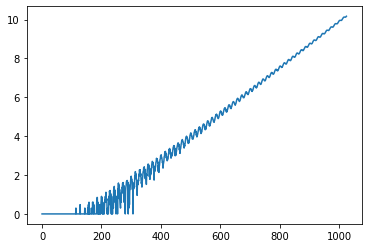

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def peptide_count_for_mass_graph(mass):
  masses = [0]*(mass+1)
  masses[0] = 1

  for i in range(mass+1):
    for j in range(len(peptide_mass)):
      if i>=peptide_mass[j]:
        masses[i] += masses[i-peptide_mass[j]]


  return masses

mass = 1024
ways = peptide_count_for_mass_graph(mass)

mass = []
way = []

for i in range(1025):
  mass.append(i)
  if ways[i]!=0:
    way.append(math.log10(ways[i]))
  else:
    way.append(0)
  

plt.plot(mass, way)
plt.show()